## Distances Between Histograms of Programs (POJ 104)

### Loading the libraries

In [40]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading the datasets

In [41]:
o3 = pd.read_csv("../features/poj_features_O3.csv", skipinitialspace=True)
o3 = o3.set_index('id')

o0 = pd.read_csv("../features/poj_features_O0.csv", skipinitialspace=True)
o0 = o0.set_index('id')

ollvm = pd.read_csv("../features/poj_features_ollvm.csv", skipinitialspace=True)
ollvm = ollvm.set_index('id')

### Datasets Normalization (Min-Max Normalization)

In [42]:
def norm(df):
    cout = 0
    for column in df.columns:
        if not (df[column].max() == 0 and df[column].min() == 0):
            dif = df[column].max() - df[column].min()
            df[column] = (df[column] - df[column].min())/dif
        print("Column {} calculated".format(cout), end='\r')
        cout += 1
    return df

In [43]:
o3 = o3.T
o3c = o3.loc['class']
o3 = o3.drop(['class'])

o3 = norm(o3)
o3 = o3.append(o3c)
o3 = o3.T

/tmp/ipykernel_278114/1074010890.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o3 = o3.append(o3c)


In [44]:
o0 = o0.T
o0c = o0.loc['class']
o0 = o0.drop(['class'])

o0 = norm(o0)
o0 = o0.append(o0c)
o0 = o0.T

/tmp/ipykernel_278114/2777341679.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  o0 = o0.append(o0c)


In [45]:
ollvm = ollvm.T
ollvmc = ollvm.loc['class']
ollvm = ollvm.drop(['class'])

ollvm = norm(ollvm)
ollvm = ollvm.append(ollvmc)
ollvm = ollvm.T

/tmp/ipykernel_278114/3911662077.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ollvm = ollvm.append(ollvmc)


### Collecting the distances between the programs of all classes
`o3Distances` is the distance between optimized and original programs.
`ollvmDistances` is the distance between obfuscated and original programs.

In [52]:
o3Distances = np.zeros(o0.shape[0])
ollvmDistances = np.zeros(o0.shape[0])

i = 0
for _, row in o0.loc[:, o0.columns != 'class'].iterrows():
    id = row.name
    original = row.to_numpy()

    if id in o3.index:
        temp = o3.loc[:, o3.columns != 'class'].loc[id]
        otimized = temp.to_numpy()
        dist = np.linalg.norm(original - otimized)
        o3Distances[i] = dist

    if id in ollvm.index:
        temp = ollvm.loc[:, ollvm.columns != 'class'].loc[id]
        obfuscated = temp.to_numpy()
        dist = np.linalg.norm(original - obfuscated)
        ollvmDistances[i] = dist

    print("The index {} was successfully calculated".format(i), end='\r')
    i += 1

In [53]:
print("Sum of distances between the O3 programs to original programs: {}".format(sum(o3Distances)))
print("Sum of distances between the OLLVM programs to original programs: {}".format(sum(ollvmDistances)))

Sum of distances between the O3 programs to original programs: 69862.17780340453
Sum of distances between the OLLVM programs to original programs: 70250.14997856955


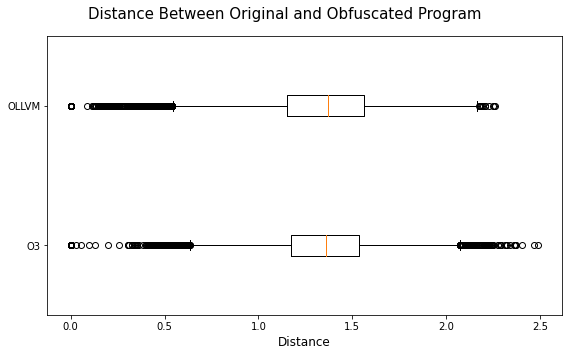

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

fig.suptitle('Distance Between Original and Obfuscated Program', fontsize=15)
ax.boxplot(
    [o3Distances, ollvmDistances], 
    vert=False, 
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)

# plt.savefig('distance.pdf')
fig.tight_layout()

In [55]:
df_O3Distances = pd.Series(o3Distances)
df_ollvmDistances = pd.Series(ollvmDistances)

def countOutliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

out = countOutliers(df_ollvmDistances)
print("Number of outliers of OLLVM: {}".format(out.sum()))
out2 = countOutliers(df_O3Distances)
print("Number of outliers of O3: {}".format(out2.sum()))

Number of outliers of OLLVM: 511
Number of outliers of O3: 690


### Collecting the distances between the programs of two different classes
`o3Distances` is the distance between optimized and original programs.
`ollvmDistances` is the distance between obfuscated and original programs.

In [82]:
c1 = np.random.randint(1, 104)
c2 = np.random.randint(1, 104)

o0c1 = o0[o0['class'] == c1]
o0c2 = o0[o0['class'] == c2]

o3c1 = o3[o3['class'] == c1]
o3c2 = o3[o3['class'] == c2]

ollvmc1 = ollvm[ollvm['class'] == c1]
ollvmc2 = ollvm[ollvm['class'] == c2]

print("Class {} selected".format(c1))
print("Class {} selected".format(c2))

Class 18 selected
Class 48 selected


In [83]:
o3c1Distances = np.zeros(o0c1.shape[0])
ollvmc1Distances = np.zeros(o0c1.shape[0])

o3c2Distances = np.zeros(o0c2.shape[0])
ollvmc2Distances = np.zeros(o0c2.shape[0])

def classDistance(o0c, o3c, ollvmc, o3cDistances, ollvmcDistances):
    i = 0
    for _, row in o0c.loc[:, o0c.columns != 'class'].iterrows():
        id = row.name
        original = row.to_numpy()

        if id in o3c.index:
            temp = o3c.loc[:, o3c.columns != 'class'].loc[id]
            otimized = temp.to_numpy()
            dist = np.linalg.norm(original - otimized)
            o3cDistances[i] = dist

        if id in ollvmc.index:
            temp = ollvmc.loc[:, ollvmc.columns != 'class'].loc[id]
            obfuscated = temp.to_numpy()
            dist = np.linalg.norm(original - obfuscated)
            ollvmcDistances[i] = dist

        print("The index {} was successfully calculated".format(i), end='\r')
        i += 1
    return (o3cDistances, ollvmcDistances)

#### ~> Distances for the fisrt class

In [84]:
result = classDistance(o0c1, o3c1, ollvmc1, o3c1Distances, ollvmc1Distances)
o3c1Distances = result[0]
ollvmc1Distances = result[1]

In [85]:
print("Sum of distances between the O3 programs to original programs: {}".format(sum(o3c1Distances)))
print("Sum of distances between the OLLVM programs to original programs: {}".format(sum(ollvmc1Distances)))

Sum of distances between the O3 programs to original programs: 626.0877331721099
Sum of distances between the OLLVM programs to original programs: 718.4451920784828


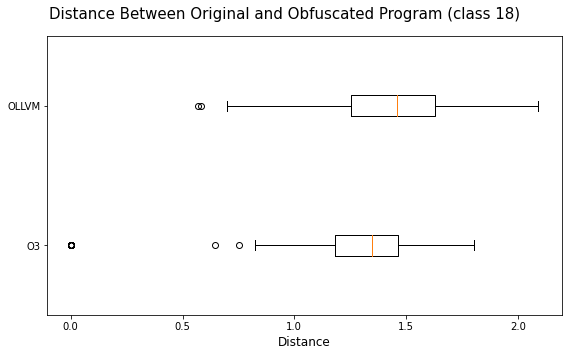

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

fig.suptitle('Distance Between Original and Obfuscated Program (class {})'.format(c1), fontsize=15)
ax.boxplot(
    [o3c1Distances, ollvmc1Distances], 
    vert=False, 
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)

# plt.savefig('distance.pdf')
fig.tight_layout()

#### ~> Distances for the second class

In [87]:
result = classDistance(o0c2, o3c2, ollvmc2, o3c2Distances, ollvmc2Distances)
o3c2Distances = result[0]
ollvmc2Distances = result[1]

In [88]:
print("Sum of distances between the O3 programs to original programs: {}".format(sum(o3c2Distances)))
print("Sum of distances between the OLLVM programs to original programs: {}".format(sum(ollvmc2Distances)))

Sum of distances between the O3 programs to original programs: 694.1863722734745
Sum of distances between the OLLVM programs to original programs: 675.3800723598409


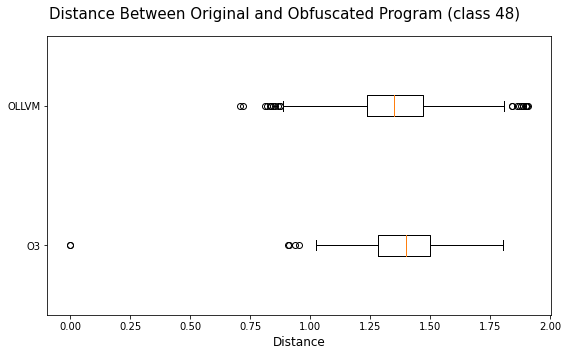

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

fig.suptitle('Distance Between Original and Obfuscated Program (class {})'.format(c2), fontsize=15)
ax.boxplot(
    [o3c2Distances, ollvmc2Distances], 
    vert=False, 
    showfliers=True,
    labels=('O3', 'OLLVM')
)
ax.set_xlabel("Distance", fontsize=12)

# plt.savefig('distance.pdf')
fig.tight_layout()